In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot


In [2]:
def read_dataset(task):
    # env : train, dev, test
    seq_in, seq_out, label = [], [], []
    for env in ['train', 'dev', 'test']:
        in_path = f"./{task}/{env}/seq.in"
        out_path = f"./{task}/{env}/seq.out"
        label_path = f"./{task}/{env}/label"
        
        with open(in_path, encoding='utf-8') as f:
            com = [line.rstrip() for line in f if line != '\n']
        seq_in.extend(com)
        
        with open(out_path, encoding='utf-8') as f:
            lab = [line.rstrip() for line in f if line != '\n']
        seq_out.extend(lab)
        
        with open(label_path, encoding='utf-8') as f:
            lab = [line.rstrip() for line in f if line != '\n']
        label.extend(lab)
        
    return seq_in, seq_out, label


# task = 'gpsr'
# seq_in, seq_out, label = read_dataset(task)
# label

In [3]:
def show_proportion(seq_out, task):
    label_df = pd.DataFrame( x for seq in seq_out for x in seq.split())
    # display(label_df.head(5))
    pie = label_df.value_counts(subset=None, dropna = True).plot(kind = 'pie', figsize = (10,9), autopct='%1.1f%%', title=task,fontsize=7)

    pie.plot()
    plot.show()
    return
    
# show_proportion(seq_out, 'mixsnips')

In [18]:
def parse_seq(seq_in, seq_out, label, task):
    intent_path = f"./{task}/intent_label.txt"
    slot_path = f"./{task}/slot_label.txt"
    
    intent = [ele.strip() for ele in open(intent_path, 'r', encoding='utf-8')]
    slot = [ele.strip() for ele in open(slot_path, 'r', encoding='utf-8')]
    
    intent_label_lst = [ele.strip() for ele in label.split('#') if ele in intent]
    slot_label_lst = [ele for ele in seq_out.split() if ele in slot and 'B' in ele]
    #print(seq_out.split())
    intent_num = len(intent_label_lst)
    slot_num = len(slot_label_lst)
    
    return {
        'command': seq_in,
        'label': seq_out,
        'intent_num': intent_num,
        'slot_num': slot_num,
        'command_length': len(seq_in.split())
    }


def get_dataframe(seq_in,seq_out, label, task):
    parsed = [parse_seq(seq_in[i], seq_out[i], label[i], task) for i in range(len(seq_in))]
    return pd.DataFrame([p for p in parsed if p is not None])


# df_info = get_dataframe(seq_in,seq_out, label,'mixsnips')
# df_info

In [5]:
def show_stat(df_info):
    display(df_info.head(10))
    print('\n')
    print(f"command length:  min: {min(df_info['command_length'])},  max: {max(df_info['command_length'])}, mean: {np.mean(df_info['command_length'])}")
    print(f"intent num:      min: {min(df_info['intent_num'])},  max: {max(df_info['intent_num'])}, mean: {np.mean(df_info['intent_num'])}")
    print(f"slot num:        min: {min(df_info['slot_num'])},  max: {max(df_info['slot_num'])}, mean: {np.mean(df_info['slot_num'])} \n")

    boxplot = df_info.boxplot(column=['intent_num', 'slot_num', 'command_length'])  
    boxplot.plot()
    plot.show()
    print('\n')

    return

# show_stat(df_info)


########################################### gpsr ########################################### 




,command,label,intent_num,slot_num,command_length
0,Could you offer something to drink to all the ...,O O O B-obj I-obj I-obj O B-dest I-dest I-dest...,1,3,16
1,Pinpoint Francis accompany him to the bookcase...,O B-per O B-per O O B-dest O O O B-obj O O B-s...,3,5,15
2,Deliver to me the food at the top dining table,O O B-dest O B-obj O O B-sour I-sour I-sour,1,3,10
3,Hand me the cleaning stuff at the middle botto...,O B-dest O B-obj I-obj O O B-sour I-sour I-sou...,1,3,11
4,Could you locate Robin look for Alex at the en...,O O O B-per O O B-per O O B-dest I-dest O O B-...,2,5,18
5,Could you take the fruits at the counter's lef...,O O O O B-obj O O B-sour I-sour O O B-dest I-dest,1,3,13
6,Please spot a cloth get the paprika from the c...,O O O B-obj O O B-obj O O B-sour O O B-obj O B...,2,6,18
7,Could you please leave apple on the storage ta...,O O O O B-obj O O B-dest I-dest O B-per O O B-per,3,4,14
8,Could you please say hello to the man dressed ...,O O O O O O O B-per I-per I-per I-per I-per I-...,1,2,16
9,Locate Charlie at the bed look for Skyler and ...,O B-per O O B-dest O O B-per O O B-per O O B-d...,2,5,15




command length:  min: 6,  max: 27, mean: 13.778712893930384
intent num:      min: 1,  max: 3, mean: 1.727004528198326
slot num:        min: 2,  max: 7, mean: 3.741229474454558 



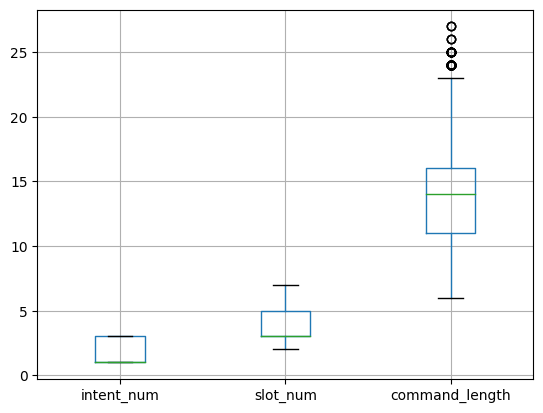

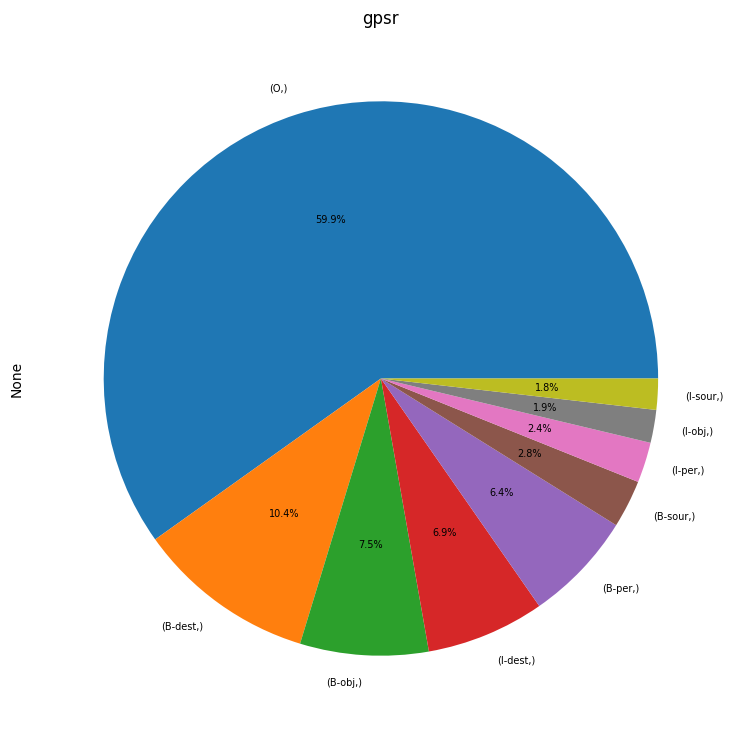


########################################### mixsnips ########################################### 




,command,label,intent_num,slot_num,command_length
0,play isham jones and swine not deserves four p...,O B-artist I-artist O B-object_name I-object_n...,2,4,9
1,play the last song by goldie and then can you ...,O O B-sort B-music_item O B-artist O O O O O O...,2,5,20
2,find a soundtrack called the spanish jade,O O B-object_type O B-object_name I-object_nam...,1,2,7
3,rate rajinikanth: the definitive biography one...,O B-object_name I-object_name I-object_name I-...,2,6,20
4,put ramy ayach on latin pop rising and find th...,O B-artist I-artist O B-playlist I-playlist I-...,2,4,14
5,lets take me cherry and tracie to a noyack bar...,O O B-party_size_description I-party_size_desc...,2,4,20
6,i want to add kiara to my digster future hits ...,O O O O B-artist O B-playlist_owner B-playlist...,3,10,34
7,book a diner for 1 in green isle and then will...,O O B-restaurant_type O B-party_size_number O ...,2,7,21
8,i need a reservation for a gastropub that serv...,O O O O O O B-restaurant_type O O O B-served_d...,1,2,13
9,list films in the neighborhood,O B-movie_type B-spatial_relation I-spatial_re...,1,2,5




command length:  min: 2,  max: 54, mean: 18.4491
intent num:      min: 1,  max: 3, mean: 1.9
slot num:        min: 1,  max: 16, mean: 4.91916 



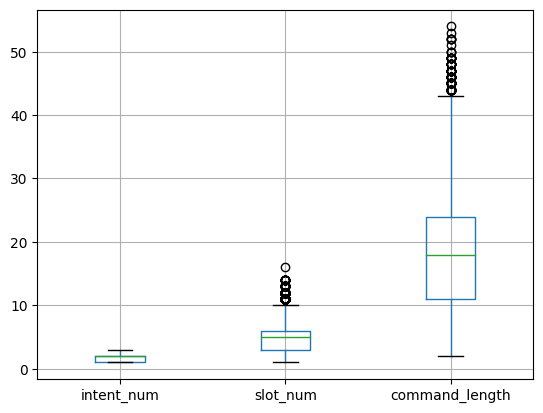

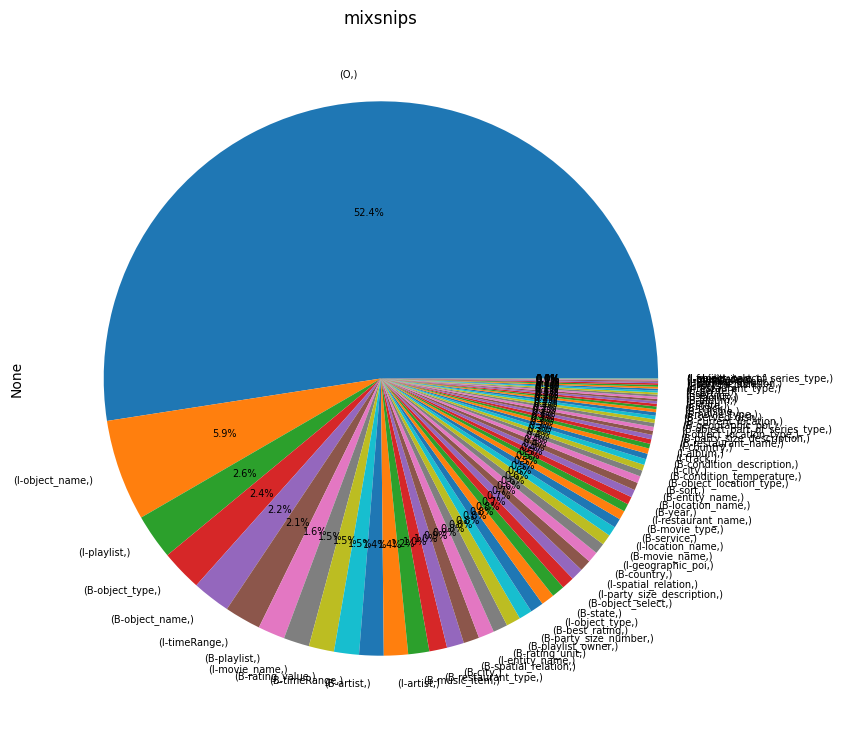


########################################### mixatis ########################################### 




,command,label,intent_num,slot_num,command_length
0,"define airline ua , names of airports and also...",O O B-airline_code O O O O O O O O O O O O B-a...,3,3,20
1,how many seats in a 100 and also which cities ...,O O O O O B-aircraft_code O O O O O O O O B-ai...,2,3,18
2,show me the type of aircraft that cp uses and ...,O O O O O O O B-airline_code O O O O O O B-cit...,2,2,16
3,show me ground transportation in westchester c...,O O O O O B-city_name I-city_name,1,1,7
4,is there a meal on delta flight 852 from san f...,O O O B-meal O B-airline_name O B-flight_numbe...,2,10,33
5,what kind of aircraft will i be flying on if i...,O O O O O O O O O O O O O B-class_type I-class...,3,18,72
6,show me the ground transportation in denver,O O O O O O B-city_name,1,1,7
7,show me city served both by nationair and cana...,O O O O O O B-airline_name O B-airline_name I-...,2,3,23
8,what are the cities that american airlines ser...,O O O O O B-airline_name I-airline_name O O O ...,3,8,34
9,show me the cheapest fare in the database and ...,O O O B-cost_relative O O O O O O O O O O O O ...,2,3,21




command length:  min: 1,  max: 76, mean: 20.2266
intent num:      min: 0,  max: 3, mean: 1.8932
slot num:        min: 0,  max: 25, mean: 4.41515 



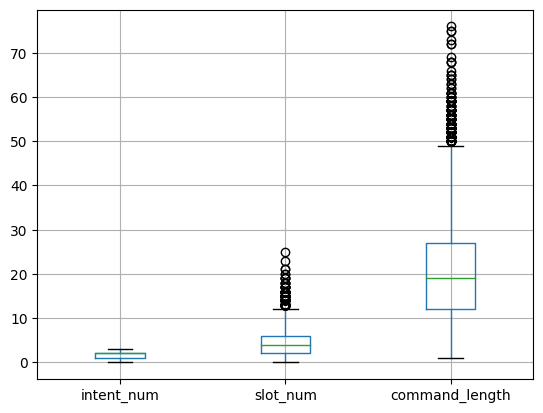

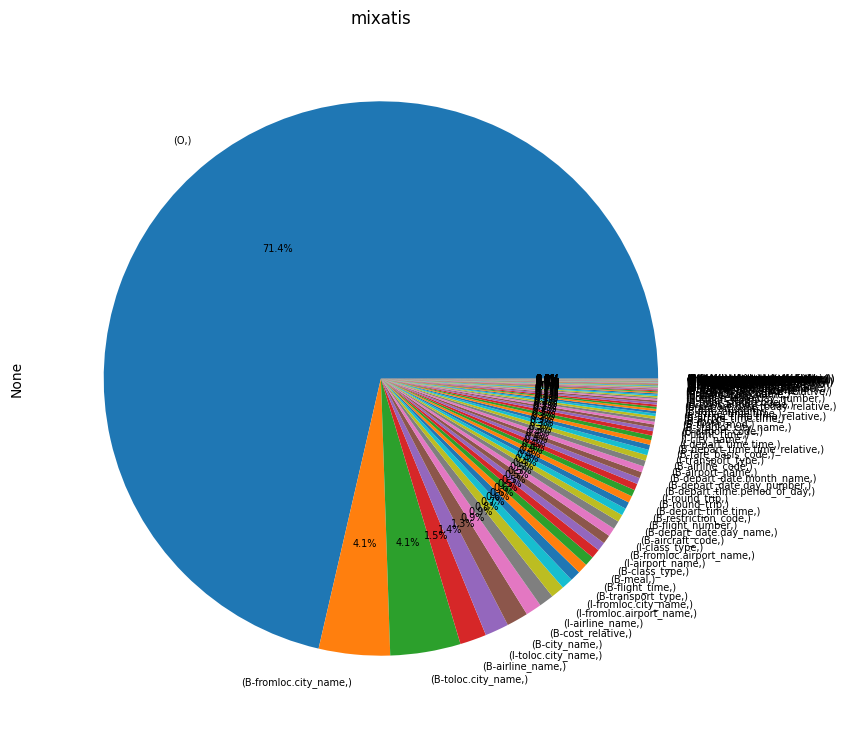

In [19]:
def show_dataset_stat(task_lst):
    for task in task_lst:
        print(f'\n########################################### {task} ########################################### \n\n')
        seq_in, seq_out, label = read_dataset(task)
        df_info = get_dataframe(seq_in,seq_out, label, task)
        show_stat(df_info)
        show_proportion(seq_out, task)
    return

# for t in ['gpsr','mixsnips', 'mixatis']:
show_dataset_stat(['gpsr','mixsnips', 'mixatis'])

# Check pronoun statistics

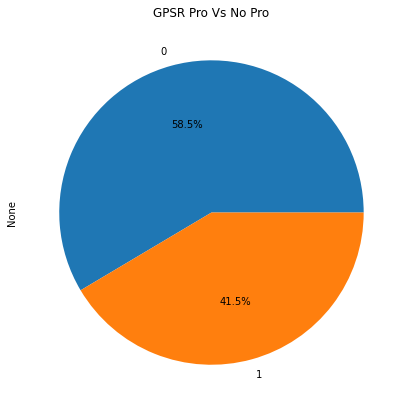

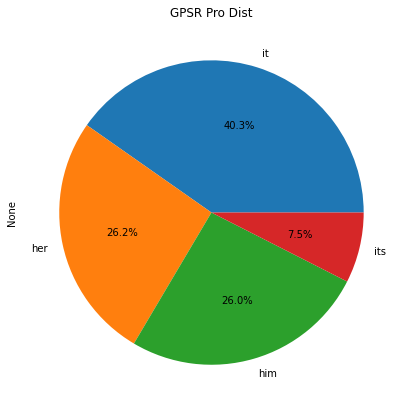

---------------------------------------------------------------------


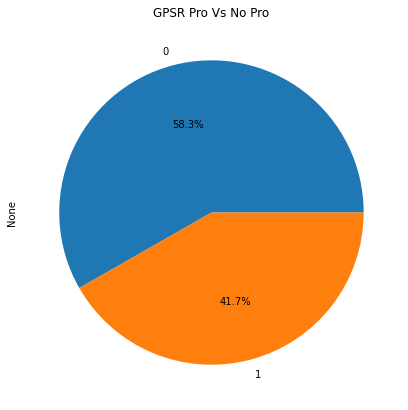

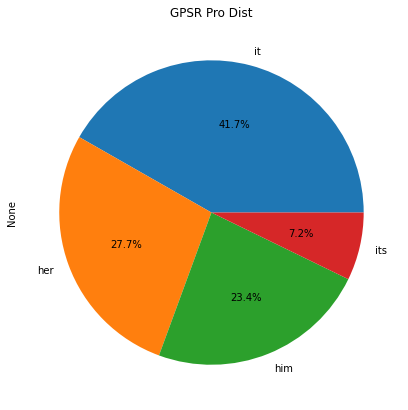

---------------------------------------------------------------------


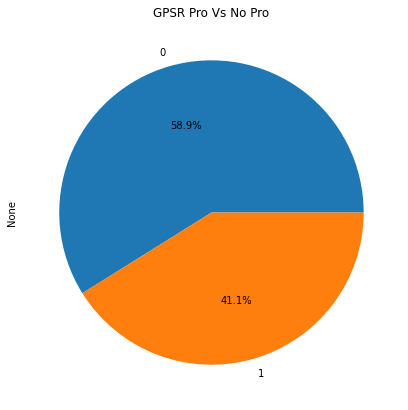

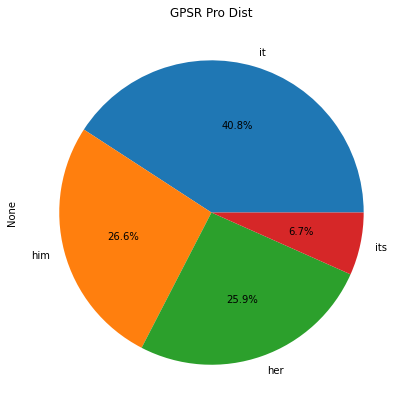

---------------------------------------------------------------------


In [3]:
def pro_text_gen(env):
    seq_in = [line.strip() for line in open(env+'/seq.in')]
    # pro_seq = [line.strip() for line in open(env+'/pro_command.txt')]
    pro_seq = [line.strip() for line in open(env+'/seq.in')]
    pro_seq_lst = [line.split() for line in pro_seq]

    pro_lst = ['it','he','him','she','her','its','hers','that','this','those','these','they','them','our','us']
    counter_lst = [[1 if ele in pro_lst else 0 for ele in command] for command in pro_seq_lst]
    counter = np.array([sum(lst) for lst in counter_lst])
    pro_proportion_pie = pd.Series(counter).value_counts().plot(kind = 'pie', figsize = (10,7), autopct='%1.1f%%', title='GPSR Pro Vs No Pro',fontsize=10)
    pro_proportion_pie.plot()
    plot.show()
    #print(pd.Series(counter).value_counts(),'\n')

    pro_lst = [ele for command in pro_seq_lst for ele in command if ele in pro_lst]
    pro_dist_pie = pd.Series(pro_lst).value_counts().plot(kind = 'pie', figsize = (10,7), autopct='%1.1f%%', title='GPSR Pro Dist',fontsize=10)
    # print(pd.Series(pro_lst).value_counts())
    pro_dist_pie.plot()
    plot.show()
    print('---------------------------------------------------------------------')
    return

pro_text_gen('gpsr_pro/train')
pro_text_gen('gpsr_pro/dev')
pro_text_gen('gpsr_pro/test')